# Fit Shallow Tara

In [25]:
# inputs
import numpy as np 
from scipy.optimize import curve_fit

from matplotlib import pyplot as plt

from cnmf.oceanography import iops

import anly_utils 
import fit_one

In [2]:
%matplotlib ipympl

# Load

In [13]:
min_wv=406.
high_cut=704.
# Load
tara_wave, tara_spec, tara_uid, l23_a = iops.tara_matched_to_l23(
        low_cut=min_wv, for_nmf_imaging=False,
        high_cut=high_cut)

Loading Tara..
Reading: /home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/data/Tara/merged_tara_pacific_microbiome_acs_160124.feather


/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/io.py:83: UserWarning: Duplicate times in Tara Oceans database
  warnings.warn("Duplicate times in Tara Oceans database")


Using bit_flags removes 127034 rows of a total 774298


/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/utils/spectra.py:80: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / mask_sum
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/utils/spectra.py:81: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / mask_sum


# Grab the one

In [8]:
ID = 1637342040000000000 
idx = np.where(tara_uid == ID)[0][0]
idx

123255

# Plot

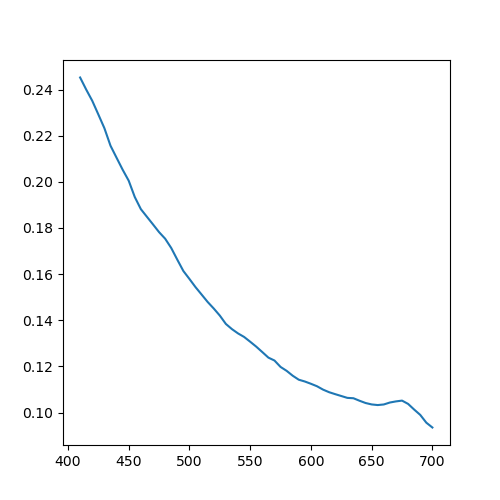

In [14]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(tara_wave, tara_spec[idx])
#
plt.show()

# Fit $a_{\rm dg}$ with exponential

## Cut to the blue

In [17]:
cut = tara_wave < 550.

In [15]:
def exp_func(wave, A, S, pivot=440.):
    return A * np.exp(-S*(wave-pivot))

In [19]:
p0 = [0.2, 0.015]
ans, cov =  curve_fit(exp_func, tara_wave[cut], 
                          tara_spec[idx,cut], 
                          p0=p0, #sigma=np.sqrt(varRrs),
                          full_output=False)

In [20]:
ans

array([0.21135842, 0.00474582])

## Check

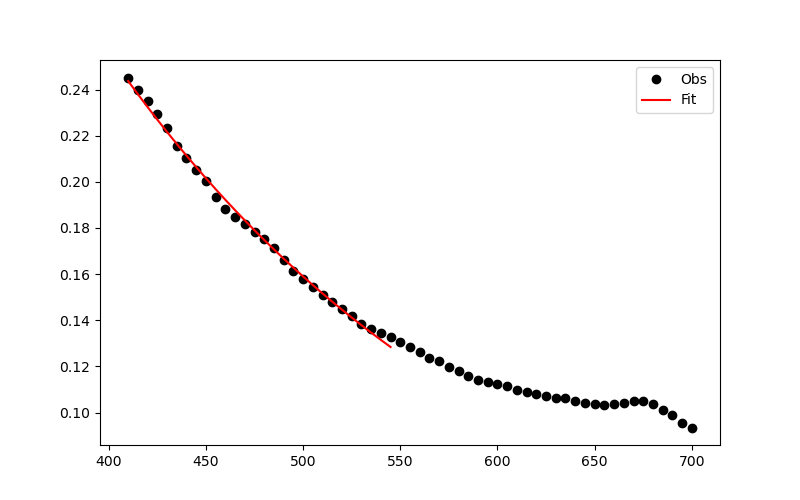

In [23]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
#
ax.plot(tara_wave, tara_spec[idx], 'ko', label='Obs')
ax.plot(tara_wave[cut], exp_func(tara_wave[cut], ans[0], ans[1]), 'r-', label='Fit')

ax.legend()

#
plt.show()

----

# Fit the high $a_{\rm ph}$ example

In [27]:
new_ans, new_cov = fit_one.fit_one(['Exp', 'Pow'], idx=1032, use_chisq=True)

Initial Rrs guess: -0.04227807813211289
Saved: ../Analysis/Fits/BIG_LM_ExpPow_1032_n02.npz


In [31]:
10**new_ans[1]

0.0025993685035493783